# 实验指导

实验目的：

1. 掌握神经网络的基本原理；
2. 掌握word2vec的基本原理；
3. 掌握Keras的基本用法；
4. 掌握tensorflow的基本用法；
5. 掌握RNN的基本原理；
6. 观察熟悉RNN的两种常见变体(LSTM和GRU)的原理和用法；
7. 熟悉深度学习自然语言处理的基本流程。 

### I 实验描述：

#### 数据： 使用爬虫获得的豆瓣评论数据
#### 目标： 建立机器学习模型，能够对输入的句子自动判断其对应的分值或感情倾向

## II 数据预处理

目的： 将文本信息变成神经网络可以处理的数据格式； 

## 第一部分： 基础理论

## III 神经网络的基本原理

#### Q1: 神经网络的Loss函数的作用为何？

回答： 表征预测值与训练集中实际值的差异，作为后续优化的基础。神经网络训练的目标就是求出使得Loss函数最小的参数值。训练的过程就是通过反向传播迭代更新网络参数，从而使得Loss不断减小。

#### Q2: 神经网络的激活函数(activation function)起什么作用？ 如果没有激活函数会怎么样？ 

回答：激活函数为神经元提供了非线性的结果输出，如果没有激活函数，就只能表征线性关系，比如纯线性模型就无法解决“异或”这类问题。

#### Q3: 神经网络的softmax如何理解， 其作用是什么？ 在`答案`中写出softmax的python表达；


答案：softmax就是“柔软的”max，非给出实际的最大值。Softmax实际上是一种概率分布，使得最大的那个概率最大，其余的概率小，所有概率和为1。

In [9]:
import numpy as np
arr=np.array([2,3,5])
softmax_arr=np.exp(arr)/np.sum(np.exp(arr))
print(softmax_arr)

[0.04201007 0.1141952  0.84379473]


#### Q4: 简述 normalized_1 和softmax函数的相同点和不同点， 说明softmax相比normalized_1该函数的优势所在
```python
output = np.array([y1, y2, y3])

normalized_1 = output / np.sum(output)
```

回答：L1正则化与Softmax都是正则化的方法，但是L1正则化具有稀疏性，可以用于特征选择。Softmax是logistic回归模型在多分类问题上的推广。

#### Q5: 写出crossentropy的函数表达式，说明该函数的作用和意义

回答：交叉熵代表两个概率分布之间的差异性。在分类时，一般用Softmax来预测一个样本落在每一类中的概率分布，用one-hot编码代表真实的分类（严格某类为1，其余全是0的概率分布），这样两者的交叉熵就可以作为损失函数，用来衡量预测分类与真实分类label之间的差异大小，在神经网络中通过反向传播不断将其缩小，预测值也就逐渐接近真实值。

### IV 掌握word2vec的基本用法

#### Q6: 说明word2vec要解决的问题背景， 以及word2vec的基本思路， 说明word2vec比起之前方法的优势；

回答：对文本中的每一个词，如果用一对一的代码（如one-hot编码）表示，无法衡量词与词之间的语义相似性。Word2Vec通过学习某词作为另一词的临近词的出现概率，认为出现在某词附近概率相近的词的语义是相近的，从而用向量表征这种语义相似性。语义相近的词对应的k维Word2Vec词向量，在k维空间中的距离也是相近的。

#### Q7: 说明word2vec的预测目标， predication target, 在答案中写出skip-gram和cbow的预测概率；

回答： 
1.  skip-gram是给定输入单词，预测目标是上下文。
$$ \hat{y}= \frac{e^{u_{o}^Tv_{c}}}{\sum_{w=1}^{n}e^{u_{w}^Tv_{c}}} $$
$v_{c}$是输入向量，$u_{w}$是所有的分类模型矩阵，$u_{o}$是输出向量的分类模型矩阵。

2.  cbow是给定上下文，预测目标是输入单词。
$$  h=\frac{1}{C}W\sum_{i=1}^{C}x_i $$
$$ \hat{y}= \frac{e^{u_{o}^Th}}{\sum_{w=1}^{n}e^{u_{w}^Th}} $$
$h$是输入向量，$u_{w}$是所有的分类模型矩阵。

#### Q8: 请说明word2vec的两种常见优化方法，分别阐述其原理；

回答：  
（1）Hierarchical Softmax  
&emsp;&emsp;把之前所有都要计算的从输出softmax层的概率计算变成了一颗二叉霍夫曼树，那么我们的softmax概率计算只需要沿着树形结构进行就可以了。我们可以沿着霍夫曼树从根节点一直走到我们的叶子节点的词。
和之前的神经网络语言模型相比，我们的霍夫曼树的所有内部节点就类似之前神经网络隐藏层的神经元,其中，根节点的词向量对应我们的投影后的词向量，而所有叶子节点就类似于之前神经网络softmax输出层的神经元，叶子节点的个数就是词汇表的大小。在霍夫曼树中，隐藏层到输出层的softmax映射不是一下子完成的，而是沿着霍夫曼树一步步完成的，因此这种softmax取名为“Hierarchical Softmax”。  
（2）Negative Sampling  
&emsp;&emsp;使用Huffman树来代替传统的神经网络，虽然可以提高模型训练的效率，但是如果训练样本里的中心词$w$是一个很生僻的词，那么就得在Huffman树中辛苦的向下走很久了。
比如我们有一个训练样本，中心词是$w$,它周围上下文共有$2c$个词，记为$context(w)$。由于这个中心词$w$,的确和$context(w)$相关存在，因此它是一个真实的正例。通过Negative Sampling采样，我们得到$neg$个和$w$不同的中心词$w_{i},i=1,2,..neg$，这样$context(w)$和$w_{i}$就组成了$neg$个并不真实存在的负例。利用这一个正例和$neg$个负例，我们进行二元逻辑回归，得到负采样对应每个词$w_{i}$对应的模型参数$\theta_{i}$，和每个词的词向量。
Negative Sampling这种求解word2vec模型的方法摒弃了Huffman树，采用了负采样的方法来求解。Negative Sampling由于没有采用Huffman树，每次只是通过采样neg个不同的中心词做负例，就可以训练模型，因此整个过程要比Hierarchical Softmax简单。

#### Q9: 请说明word2vec中哈夫曼树的作用；

回答：Huffman树可以使得Word2Vec的向量维数降低。

#### Q10: 在gensim中如何实现词向量？ 请将gensim中实现词向量的代码置于`答案`中

回答：
```python
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = [['first', 'sentence'], ['second', 'sentence']]
# train word2vec on the two sentences
model = gensim.models.Word2Vec(sentences, min_count=1)
```

#### Q11: 请说出除了 skip-gram和cbow的其他4中词向量方法的名字， 并且选取其中两个叙述其基本原理。

回答：（1）LSA（Latent semantic analysis）  
对term-document矩阵（矩阵的每个元素为tf-idf）进行奇异值分解(SVD)，从而得到term的向量表示和document的向量表示。此处使用的TF-IDF主要还是term的全局统计特征。LSA和Word2Vec作为两大类方法的代表，LSA是利用了全局特征的矩阵分解方法，Word2Vec是利用局部上下文的方法。  
（2）GloVe  
GloVe利用全局统计信息预测词j出现在词i的上下文环境中的概率。GloVe既使用了语料库的全局统计（overall statistics）特征，也使用了局部的上下文特征（即滑动窗口）。为了做到这一点GloVe模型引入了Co-occurrence Probabilities Matrix。  
$P_{ij}=P\left(j\vert{i}\right)=\frac{X_{ij}}{X_i}$  是词$j$出现在词$i$上下文的概率。
GloVe认为，这不同的词对应的词向量通过某种函数的作用后所呈现出来的规律和$Ratio=\frac{P_{ik}}{P_{jk}}$具有一致性，即相等，也就可以认为词向量中包含了共现概率矩阵中的信息。  
（3）one-hot  
（4）TF-IDF

### V 掌握keras的基本用法

#### Q12. 参考keras参考手册，构建一个机器学习模型，该模型能够完成使用DNN(deep neural networks) 实现MNIST数据集的分类；

回答：代码请置于下方：

hints:  keras 序列模型构建 https://keras.io/getting-started/sequential-model-guide/ 

In [16]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
import numpy as np

Using TensorFlow backend.


In [31]:
#先用TensorFlow的方式加载数据集
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('C:/Users/trans02/PycharmProjects/untitled1/pycode/MNIST_data/',one_hot=True)
x_train, y_train = mnist.train.images,mnist.train.labels
x_test, y_test = mnist.test.images, mnist.test.labels
# x_train = x_train.reshape(-1, 28, 28,1).astype('float32')
# x_test = x_test.reshape(-1,28, 28,1).astype('float32')
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

Extracting C:/Users/trans02/PycharmProjects/untitled1/pycode/MNIST_data/train-images-idx3-ubyte.gz
Extracting C:/Users/trans02/PycharmProjects/untitled1/pycode/MNIST_data/train-labels-idx1-ubyte.gz
Extracting C:/Users/trans02/PycharmProjects/untitled1/pycode/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting C:/Users/trans02/PycharmProjects/untitled1/pycode/MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784) (55000, 10)
(10000, 784) (10000, 10)


In [46]:
#建模
model = Sequential()
# model.add(Dense(512,activation='relu',input_shape=(28*28,)))
# model.add(Dropout(0.2))
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10,activation='softmax'))
model.add(Dense(10,activation='softmax',input_shape=(28*28,)))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(),
              metrics = ['accuracy'])

In [34]:
batch_size = 128
epochs = 5

In [49]:
history = model.fit(x_train,y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data=(x_test,y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/5
55000/55000 [==============================] - 1s 22us/step - loss: 0.2779 - acc: 0.9222 - val_loss: 0.2737 - val_acc: 0.9239
Epoch 2/5
55000/55000 [==============================] - 1s 24us/step - loss: 0.2735 - acc: 0.9248 - val_loss: 0.2702 - val_acc: 0.9249
Epoch 3/5
55000/55000 [==============================] - 2s 29us/step - loss: 0.2701 - acc: 0.9245 - val_loss: 0.2694 - val_acc: 0.9257
Epoch 4/5
55000/55000 [==============================] - 1s 24us/step - loss: 0.2672 - acc: 0.9267 - val_loss: 0.2689 - val_acc: 0.9259
Epoch 5/5
55000/55000 [==============================] - 2s 32us/step - loss: 0.2647 - acc: 0.9266 - val_loss: 0.2691 - val_acc: 0.9266


In [50]:
loss,accuracy = model.evaluate(x_test,y_test,verbose=0)
print('loss:%f'%loss+'\n'+'accuracy:%f'%accuracy)

loss:0.269142
accuracy:0.926600


### VI 掌握tensorflow的基本用法

#### Q13: 参考tensorflow的参考手册，构建一个机器学习模型，该模型能够完成使用DNN(deep neural networks)实现MNIST数据集的分类；

回答：代码请置于下方：

hints:tensorflow实现MNIST https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/2_fullyconnected.ipynb

In [13]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('C:/Users/trans02/PycharmProjects/untitled1/pycode/MNIST_data/',one_hot=True)

print('input success')
print(mnist.train.images.shape,mnist.train.labels.shape)
print(mnist.test.images.shape,mnist.test.labels.shape)
print(mnist.validation.images.shape,mnist.validation.labels.shape)

import tensorflow as tf
sess=tf.InteractiveSession()
x=tf.placeholder(tf.float32,[None,784])
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))
y=tf.nn.softmax(tf.matmul(x,W)+b)

y_=tf.placeholder(tf.float32,[None,10])
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1]))

train_step=tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
tf.global_variables_initializer().run()

for i in range(1000):
    batch_xs,batch_ys=mnist.train.next_batch(100)
    train_step.run({x:batch_xs,y_:batch_ys})

correct_prediction=tf.equal(tf.argmax(y,1),tf.arg_max(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print(accuracy.eval({x:mnist.test.images,y_:mnist.test.labels}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:/Users/trans02/PycharmProjects/untitled1/pycode/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:/Users/trans02/PycharmProjects/untitled1/pycode/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting C:/Users/trans02/PycharmProjects/untitled1/pycode/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting C:/Users/trans02/PycharmProjects/untitled1/pycode/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
input success
(55000, 784) (55000, 10)
(10000, 784) (10000, 10)
(5000, 784) (5000, 10)
Instructions f

#### Q14: 参考keras和tensorflow对同一问题的实现，说明keras和tensorflow的异同；

回答：Tensorflow搭建模型过程

#### Q15: Q12， Q13 的tensorflow 或 keras 模型的训练时准确率和测试集准确率分别是多少？
回答：

Keras只有一层Dense：
loss:0.269142
accuracy:0.926600

TensorFlow只有一层：
0.9193

#### Q16: 训练时准确率大于测试集准确率的现象叫什么名字，在神经网络中如何解决该问题？
回答：

过拟合。可以通过以下方法减小过拟合：  
（1）在神经网络中，如果参数过多，就容易出现过拟合，可以通过简化模型来解决。比如GRU对于LSTM来说就简化了网络结构，减少了参数，因而可以减轻过拟合。  
（2）在训练过程中随机丢弃一部分数据，采用dropout的方法也可避免神经网络过度学习训练集的特征。  
（3）在每一轮epoch结束后测一下测试集的准确率，如果accuracy不再提升，则停止训练（early stopping）。  
（4）在loss函数上附加一个正则化项，可以使得模型参数变得稀疏，从而减轻过拟合。

#### Q17: 请使用自己的语言简述通过正则化 (regularization)减小过拟合的原理；
回答：

正则化的一般形式是误差加上一个正则项。特征变量过多会导致过拟合，为了防止过拟合会选择一些比较重要的特征变量，而删掉很多次要的特征变量。但是，如果我们实际上却希望利用到这些特征信息，所以可以添加正则化项来约束这些特征变量，使得这些特征变量的权重很小，接近于0，这样既能保留这些特征变量，又不至于使得这些特征变量的影响过大。

#### Q18: 在tensorflow官方实例中给出的fully connected 神经网络的分类模型中，数据进行了哪些预处理，这些预处理的原因是什么？ 
回答：

### VII 掌握RNN的基本原理

#### Q19: 简述RNN解决的问题所具有的特点；
回答：

RNN适合处理时间序列相关的问题，比如语音识别、文本理解等。相比于CNN适合空间二维结构的数据处理（图像识别），RNN在NLP中得到了广泛应用。

#### Q20: 写出RNN实现时间或者序列相关的数学实现(见课程slides)；
回答：

$h_t=\sigma_h(W_h\cdot h_{t-1})$

#### Q20: 简述RNN的两种重要变体的提出原因和基本原理？
回答：

标准的RNN结构中只有一个神经元，一个tanh层进行重复的学习，这样会存在一些弊端。例如，在比较长的环境中，相关的信息和预测的词之间的间隔可以是非常长的，导致RNN 并不能够成功学习到这些知识，LSTM模型就可以解决这一问题。
标准LSTM模型是一种特殊的RNN类型，在每一个重复的模块中有四个特殊的结构，以一种特殊的方式进行交互。LSTM模型的核心思想是“细胞状态”。“细胞状态”类似于传送带。直接在整个链上运行，只有一些少量的线性交互。信息在上面流传保持不变会很容易。 LSTM 有通过精心设计的称作为“门”的结构来去除或者增加信息到细胞状态的能力。门是一种让信息选择式通过的方法。他们包含一个 sigmoid 神经网络层和一个 pointwise 乘法操作。  
GRU作为LSTM的一种变体，将忘记门和输入门合成了一个单一的更新门。同样还混合了细胞状态和隐藏状态，加诸其他一些改动。最终的模型比标准的 LSTM 模型要简单。LSTM和GRU都能通过各种Gate将重要特征保留，保证其在long-term 传播的时候也不会被丢失。 

#### Q21: Attentional RNN 以及 Stacked RNN 和 Bi-RNN 分别是什么，其做了什么改动？
回答：

## 第二部分： 实验过程

### IIX 数据预处理

#### Q22：要实现文本分类或情感分类，文本信息需要进行哪些初始化操作？自己手工实现，keras提供的API，tenorflow提供的API，分别是哪些？请提供关键代码置于下边`回答`中

回答：

1. 简述所需要的初始化操作：
2. 自己手工实现的id_to_word, word_to_id, padding, batched等操作如何实现？
#    + id_to_word, word_to_id
    
```python
vocab_list=['c','d','a','b']

def word_to_id(word,vocab_list):
    dic = {}
    for k, v in list(enumerate(vocab_list)): dic[k] = v
    dic = {v: k for k, v in dic.items()}
    return dic[word]

def id_to_word(id,vocab_list):
    dic = {}
    for k, v in list(enumerate(vocab_list)): dic[k] = v
    return dic[id]

#按id遍历
for k in range(len(vocab_list)):print(id_to_word(k,vocab_list))
#按word遍历
for k in vocab_list:print(word_to_id(k,vocab_list))
```

# + padding
    
```python
def padding(vector_list,max_length,padding='post',truncating='post'):
    for k in range(len(vector_list)):
        if len(vector_list[k])<max_length:
            if padding=='post' :vector_list[k]+=[0]*(max_length-len(vector_list[k]))#后面补0
            elif padding=='pre' :vector_list[k]=[0]*(max_length-len(vector_list[k]))+vector_list[k]#后面补0
        elif len(vector_list[k])>max_length:
            if truncating=='post' :vector_list[k]=vector_list[k][:max_length]#后面截断
            elif truncating=='pre' :vector_list[k]=vector_list[k][(len(vector_list[k])-max_length):]#前面截断
    return vector_list

vector_list=[[3,4,2,5],[2,3,7],[7,5,9,3,6],[6,5],[2]]
print(padding(vector_list,3))
vector_list=[[3,4,2,5],[2,3,7],[7,5,9,3,6],[6,5],[2]]
print(padding(vector_list,3,padding='pre'))
vector_list=[[3,4,2,5],[2,3,7],[7,5,9,3,6],[6,5],[2]]
print(padding(vector_list,3,truncating='pre'))
vector_list=[[3,4,2,5],[2,3,7],[7,5,9,3,6],[6,5],[2]]
print(padding(vector_list,3,padding='pre',truncating='pre'))

Output:
[[3, 4, 2], [2, 3, 7], [7, 5, 9], [6, 5, 0], [2, 0, 0]]
[[3, 4, 2], [2, 3, 7], [7, 5, 9], [0, 6, 5], [0, 0, 2]]
[[4, 2, 5], [2, 3, 7], [9, 3, 6], [6, 5, 0], [2, 0, 0]]
[[4, 2, 5], [2, 3, 7], [9, 3, 6], [0, 6, 5], [0, 0, 2]]
```



# + batched
    
```python
def get_batches(x,y,batch_size):
    truncated_num=len(x)//batch_size * batch_size
    x, y = x[:truncated_num], y[:truncated_num]
    for batch_index in range(0, len(x), batch_size):
        yield x[batch_index:batch_index + batch_size], y[batch_index:batch_index + batch_size]

x=[[2,3],[3,5],[6,9],[5,3],[7,5],[5,3],[8,4]]
y=[1,0,1,1,0,0,1]

for x_batch,y_batch in get_batches(x,y,3):print('x_batch:%s'%x_batch,'y_batch:%s'%y_batch)
    
Output:
x_batch:[[2, 3], [3, 5], [6, 9]] y_batch:[1, 0, 1]
x_batch:[[5, 3], [7, 5], [5, 3]] y_batch:[1, 0, 0]
```

hints: 

+ 参考1 https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py
+ 参考2 

### IX 构建神经网络模型

#### Q22:在没有预训练的词向量时候， keras 如何实现embedding操作，即如何依据一个单词的序列获得其向量表示？
回答：

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, vector_size, input_length=max_length))


#### Q23:在没有预训练的词向量时候， tensorflow 如何实现embedding操作，即如何依据一个单词的序列获得其向量表示？
回答：

#### Q24: 在有预先训练的词向量时候，keras和tensorflow又如何实现embeding操作

回答：

#### Q25： 基于上文进行的数据预处理，使用keras和tensorflow如何构建神经网络模型？请提供关键代码

回答： keras模型构建的关键代码：

回答：tensorflow模型构建的关键代码：

###  X 使用keras的history观察loss以及accuracy的变化

#### Q26: keras如何观察模型的loss变化以及准确率的变化，请列出关键代码

回答：
如果不设置验证集，方法（1）设置validation_split。方法（2）自己输入validation_data: tuple (x_val, y_val) or tuple  (x_val, y_val, val_sample_weights)。画图就会出现acc一直是1，loss一直是0的状况。
set the 
validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling.
```python
history=model.fit(train_x, train_y, validation_split=0.2,epochs=5, verbose=1)

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])
plt.show()
```

#### Q27: 请使用matplotlib画出loss变化的趋势；

回答：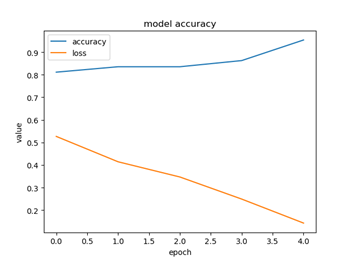

### XI 使用tensorflow tensorboard观察loss, accuracy的变化

#### Q28: tensorflow如何观察模型的loss变化以及准确率的变化， tensor board 如何使用？ 请列出关键代码

回答：

#### Q29: 试着点击tensor board的不同按钮 观察图像的变化； 试着给tensorflow board机制 写入不同时候训练的模型时候，给模型取不同的名字，观察tensor board的图像变化；

回答：

### XII 观察熟悉RNN的两种变体的原理和方法

#### Q30:试着改进RNN，使用LSTM， GRU 进行模型的改动， 观察训练结果(loss和accuracy)的变化， 你观察到了什么变化？ 如何解释？

回答：

### XIII 模型的改进

#### Q31: 修改vocabulary size, embedding size, 并且结合使用LSTM， GRU， Bi-RNN， Stacked， Attentional, regularization, 等各种方法组合进行模型的优化， 至少进行10次优化，每次优化请按照以下步骤填写：

回答：
# 见Github代码

---这是一个实例----

第1次优化：

1. 存在的问题： loss下降太慢；
2. 准备进行的优化：减小模型的神经单元数量；
3. 期待的结果：loss下降加快；
4. 实际结果：loss下降的确加快(或者并没有加快)
5. 原因分析：模型神经元数量减小，收敛需要的次数减少，loss下降加快


---你的实验优化结构记录在此---

**第1次优化**：

1. 存在的问题： 
2. 准备进行的优化：
3. 期待的结果：
4. 实际结果：
5. 原因分析：

**第2次优化**：

1. 存在的问题： 
2. 准备进行的优化：
3. 期待的结果：
4. 实际结果：
5. 原因分析：

**第3次优化**：

1. 存在的问题： 
2. 准备进行的优化：
3. 期待的结果：
4. 实际结果：
5. 原因分析：

**第4次优化**：

1. 存在的问题： 
2. 准备进行的优化：
3. 期待的结果：
4. 实际结果：
5. 原因分析：

**第5次优化**：

1. 存在的问题： 
2. 准备进行的优化：
3. 期待的结果：
4. 实际结果：
5. 原因分析：

**第6次优化**：

1. 存在的问题： 
2. 准备进行的优化：
3. 期待的结果：
4. 实际结果：
5. 原因分析：

**第7次优化**：

1. 存在的问题： 
2. 准备进行的优化：
3. 期待的结果：
4. 实际结果：
5. 原因分析：

**第9次优化**：

1. 存在的问题： 
2. 准备进行的优化：
3. 期待的结果：
4. 实际结果：
5. 原因分析：

**第10次优化**：

1. 存在的问题： 
2. 准备进行的优化：
3. 期待的结果：
4. 实际结果：
5. 原因分析：


### XIV问题： 本次实验的总结

请写实验的总结报告，描述此次项目的主要过程，其中遇到的问题，以及如何解决这些问题的，以及有什么经验和收获。